In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df_null = round(100 * df.isna().sum() /len(df), 2)
df_null

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [8]:
plt.style.use(['science','notebook','grid'])

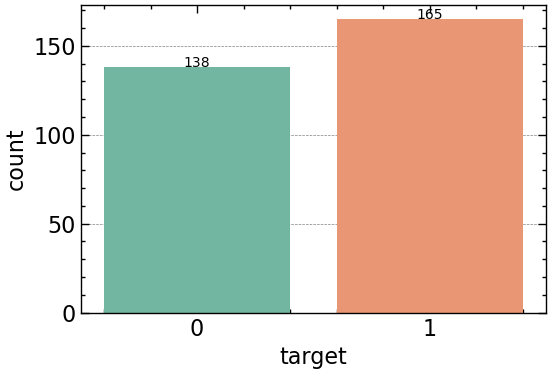

In [9]:
fig = plt.figure(figsize=(6,4), dpi=100)

ax = sns.countplot(x='target', data=df, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
            y = height + 0.6, 
            s = '{:.0f}'.format(height), 
            ha ='center')
plt.show();

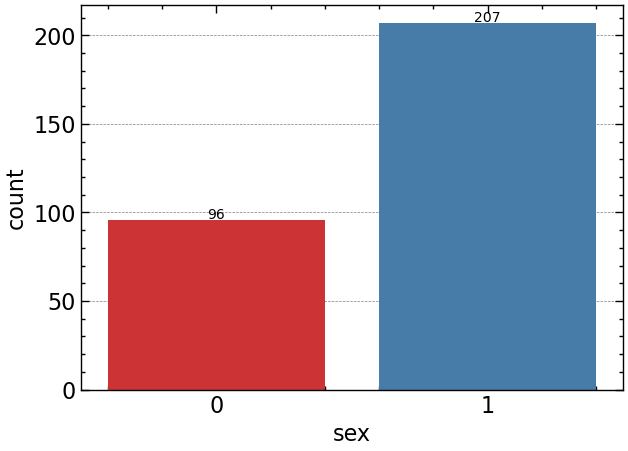

In [10]:
fig = plt.figure(figsize=(7,5), dpi=100)

ax = sns.countplot(x='sex', data=df, palette='Set1')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width() / 2, 
            y = height + 0.5, 
            s = '{:.0f}'.format(height), 
            ha = 'center')
plt.show()    

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
plt.style.use('default')

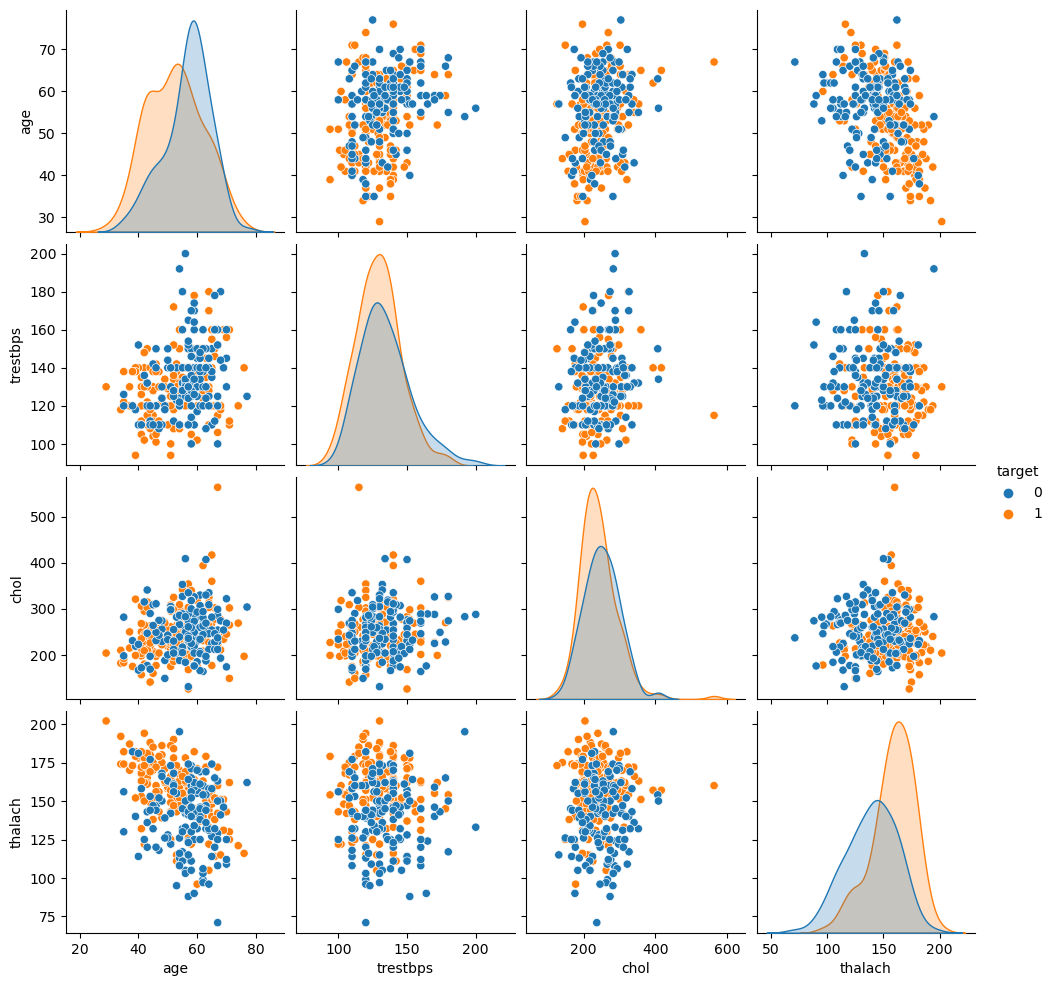

In [13]:
sns.pairplot(df[['age','trestbps','chol','thalach','target']],hue='target');

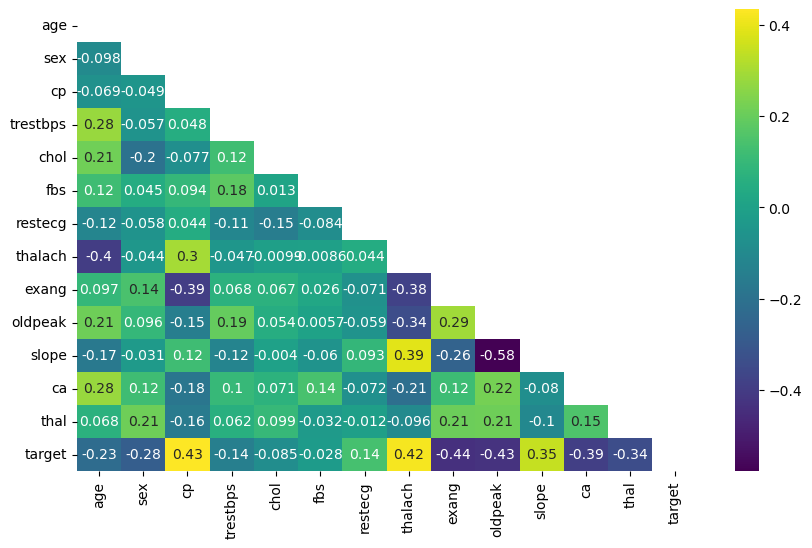

In [14]:
# metrix
metrix = df.corr()

# mask
mask = np.zeros_like(metrix)
mask[np.triu_indices_from(metrix)]=True

plt.figure(figsize=(10, 6), dpi=100)
sns.heatmap(metrix, mask=mask, annot=True, cmap='viridis');

----
---
## Split Data

In [15]:
X = df.drop('target', axis =1)
y = df['target']

In [16]:
# train test split
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test =train_test_split(X, y , test_size = 0.1, random_state = 101)

---
## Scaling Data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

---
## Create Model

In [21]:
from sklearn.linear_model import LogisticRegressionCV

In [22]:
log_model = LogisticRegressionCV()

In [23]:
log_model.fit(scaler_X_train, y_train)

LogisticRegressionCV()

In [24]:
log_model.C_

array([0.04641589])

In [25]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeffecients

In [26]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [27]:
coef = pd.Series(index = X.columns, data=log_model.coef_[0])

In [28]:
coefs = coef.sort_values()

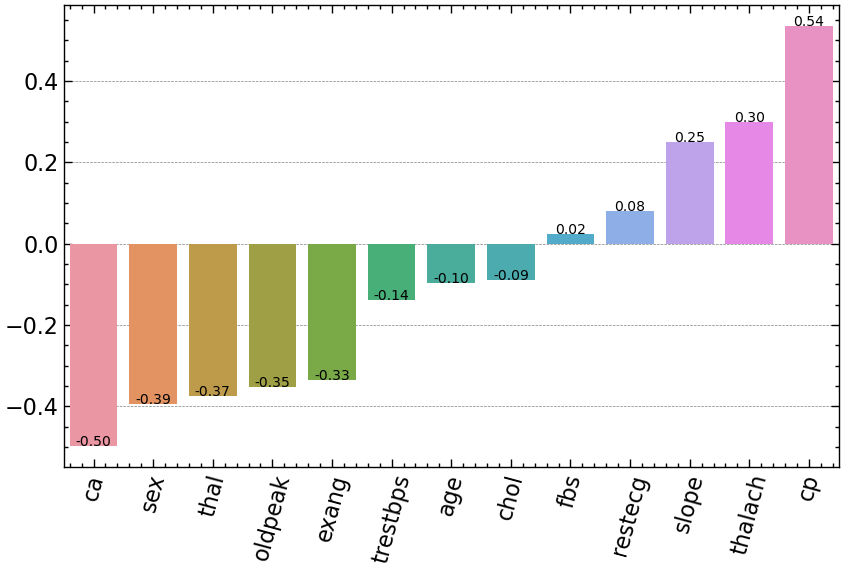

In [29]:
plt.style.use(['science','notebook','grid'])
fig = plt.figure(figsize=(10, 6), dpi=100)
ax = sns.barplot(x=coefs.index, y =coefs.values)

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height ,
            s = '{:.2f}'.format(height), 
            ha = 'center')
plt.xticks(rotation=75)
plt.show()

## Prediction

In [30]:
y_pred = log_model.predict(scaler_X_test)

---
---
## Model Performed evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  3],
       [ 2, 14]], dtype=int64)

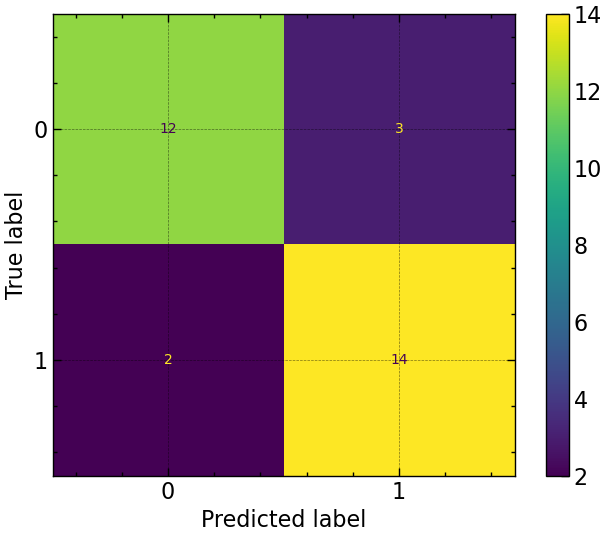

In [34]:
ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = log_model.classes_).plot();

In [35]:
from sklearn.metrics import  PrecisionRecallDisplay, RocCurveDisplay

In [36]:
help(PrecisionRecallDisplay)

Help on class PrecisionRecallDisplay in module sklearn.metrics._plot.precision_recall_curve:

class PrecisionRecallDisplay(builtins.object)
 |  PrecisionRecallDisplay(precision, recall, *, average_precision=None, estimator_name=None, pos_label=None)
 |  
 |  Precision Recall visualization.
 |  
 |  It is recommend to use
 |  :func:`~sklearn.metrics.PrecisionRecallDisplay.from_estimator` or
 |  :func:`~sklearn.metrics.PrecisionRecallDisplay.from_predictions` to create
 |  a :class:`~sklearn.metrics.PredictionRecallDisplay`. All parameters are
 |  stored as attributes.
 |  
 |  Read more in the :ref:`User Guide <visualizations>`.
 |  
 |  Parameters
 |  -----------
 |  precision : ndarray
 |      Precision values.
 |  
 |  recall : ndarray
 |      Recall values.
 |  
 |  average_precision : float, default=None
 |      Average precision. If None, the average precision is not shown.
 |  
 |  estimator_name : str, default=None
 |      Name of estimator. If None, then the estimator name is n

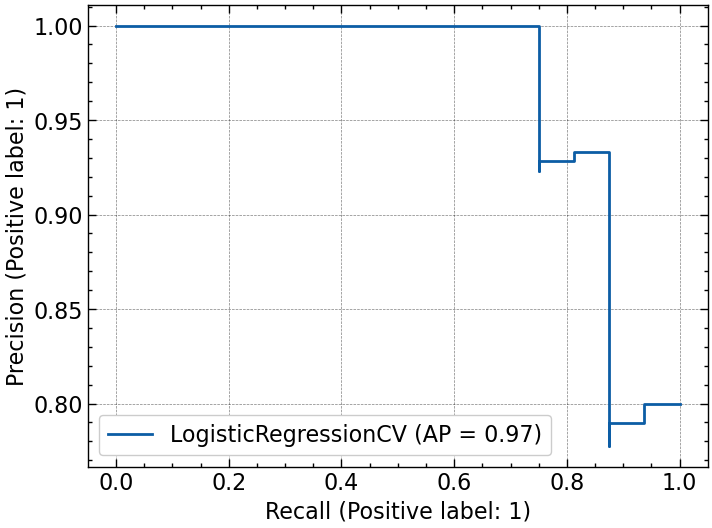

In [37]:
PrecisionRecallDisplay.from_estimator(log_model, scaler_X_test, y_test);

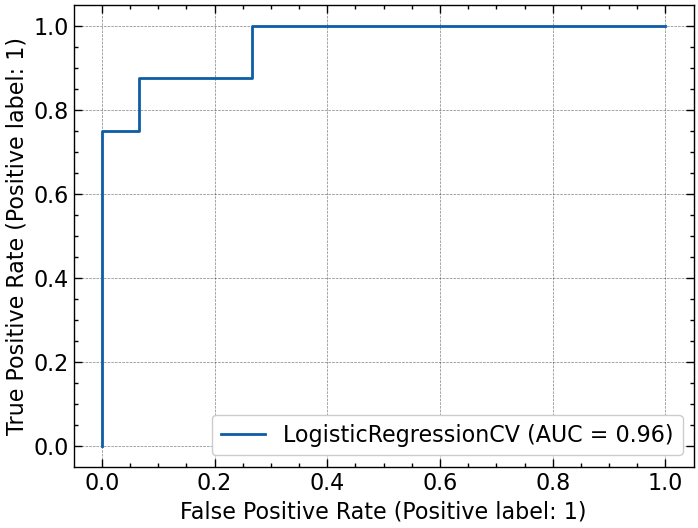

In [38]:
RocCurveDisplay.from_estimator(log_model, scaler_X_test, y_test);

In [54]:
X_test.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2


In [56]:
y_test.tail()

211    0
98     1
279    0
158    1
268    0
Name: target, dtype: int64

In [55]:
patient = [[54,  1,  0, 122, 286, 0, 0, 116, 1, 3.2, 1, 2, 2]]

In [57]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [58]:
y_test.iloc[-1]

0

In [60]:
log_model.predict(patient)

array([0], dtype=int64)

In [61]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])